## **Importing Required Libraries**

In [1]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
from sklearn.preprocessing import StandardScaler as sct
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional
from keras.optimizers import SGD

## **Creating parameters for the stock**

In [ ]:
end = dt.datetime.now()
start = dt.datetime(2002, 1, 1)
m = web.DataReader("MRF.NS", 'yahoo', start, end)

Error: Session cannot generate requests

In [ ]:
m.head()
m.dtypes
m=pd.DataFrame(m)


In [ ]:
m.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-07-01,910.0,880.0,910.0,897.599976,426.0,817.111633
2002-07-02,905.0,895.0,900.0,903.650024,310.0,822.619263
2002-07-03,910.0,900.0,910.0,906.700012,336.0,825.395691
2002-07-04,925.0,910.0,920.0,916.799988,591.0,834.589966
2002-07-05,935.0,910.0,915.0,927.299988,1623.0,844.148315


In [ ]:
m=m.reset_index()

<Figure size 720x720 with 0 Axes>

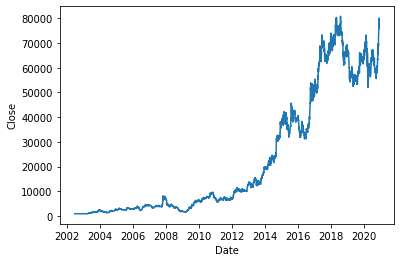

<Figure size 720x720 with 0 Axes>

In [ ]:
sns.lineplot(x='Date',y='Close',data=m)

In [ ]:
import plotly as plt

In [1]:
sns.heatmap()

NameError: name 'sns' is not defined

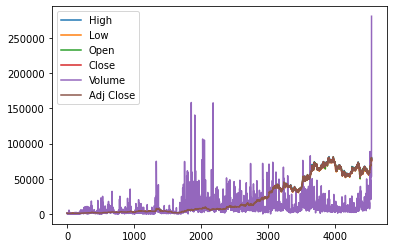

In [ ]:
m.rolling(1).mean().plot(label='12 Month Rolling Mean',)
plt.legend()

<Figure size 432x288 with 0 Axes>

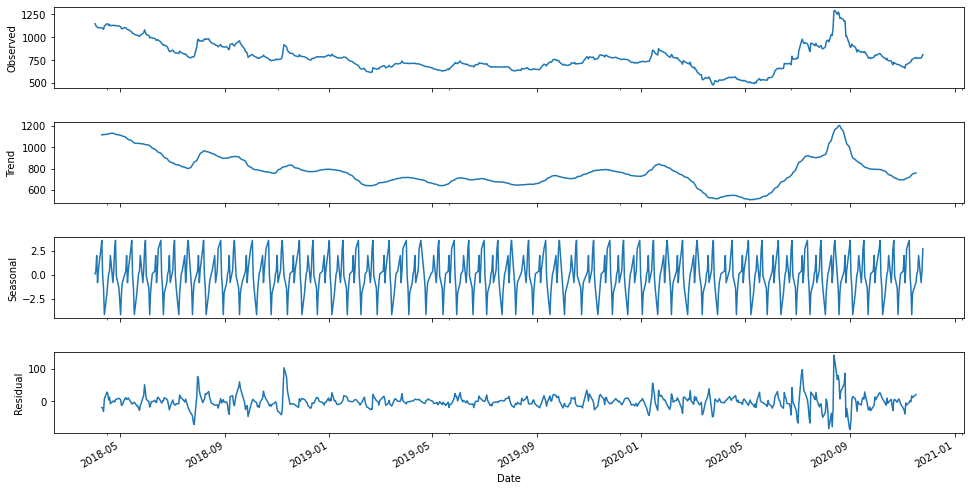

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(sk1, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15,8)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adf_check(sk['Close'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.861092583433754
p-value : 0.05006308046765027
#Lags Used : 3
Number of Observations Used : 650
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
sk['Open First Difference'] = sk['Close'] - sk['Close'].shift(1)

In [ ]:
sk['Open First Difference'].head()

Date
2018-04-02          NaN
2018-04-03   -20.650024
2018-04-04   -12.699951
2018-04-05    -1.950073
2018-04-06   -11.099976
Name: Open First Difference, dtype: float64

In [ ]:
adf_check(sk['Open First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -12.860595815748763
p-value : 5.120309835914041e-24
#Lags Used : 2
Number of Observations Used : 650
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


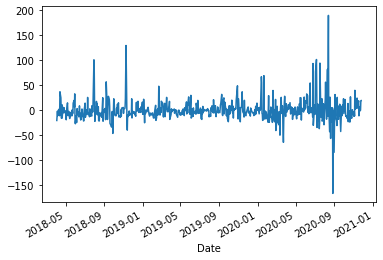

In [ ]:
sk['Open First Difference'].plot()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

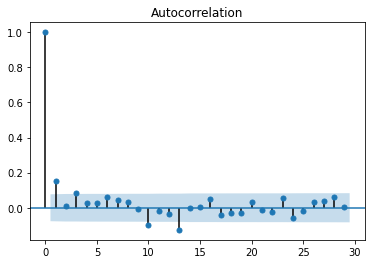

In [ ]:
fig_first = plot_acf(sk["Open First Difference"].dropna())

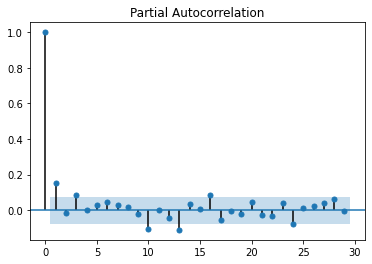

In [ ]:
result = plot_pacf(sk["Open First Difference"].dropna())

<function matplotlib.pyplot.show>

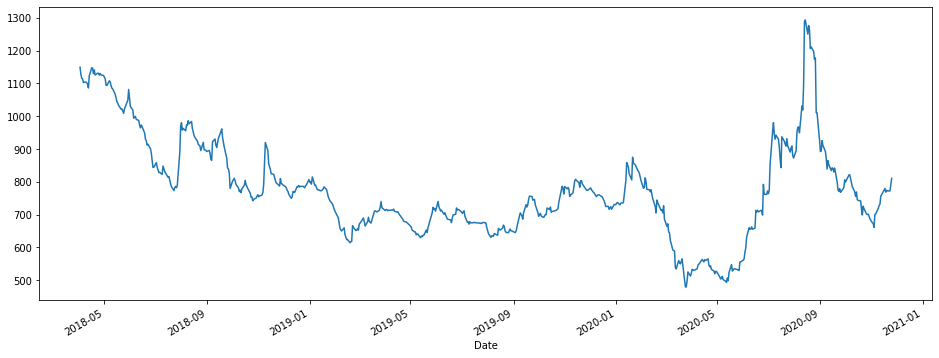

In [ ]:
sk['Close'].plot(figsize=(16,6))
sk.rolling(window=30).mean()['Close'].plot
plt.show

In [ ]:
sk1=sk.reset_index()['Close']

In [ ]:
sk1.tail()

649    774.250000
650    772.200012
651    772.150024
652    791.200012
653    810.450012
Name: Close, dtype: float64

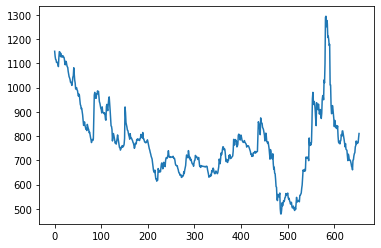

In [ ]:
plt.plot(sk1)

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
sk1=scaler.fit_transform(np.array(sk1).reshape(-1,1))


In [ ]:
sk1

array([[8.22742089e-01],
       [7.97384411e-01],
       [7.81789210e-01],
       [7.79394573e-01],
       [7.65764099e-01],
       [7.67728827e-01],
       [7.65088804e-01],
       [7.58948938e-01],
       [7.45257006e-01],
       [7.90569249e-01],
       [8.21084355e-01],
       [8.19242395e-01],
       [7.99103603e-01],
       [8.12672768e-01],
       [7.93639182e-01],
       [8.00700029e-01],
       [8.00086042e-01],
       [7.93516265e-01],
       [7.99656132e-01],
       [7.93946176e-01],
       [7.92165525e-01],
       [7.79763025e-01],
       [7.56124539e-01],
       [7.54344038e-01],
       [7.72272418e-01],
       [7.67606059e-01],
       [7.54221121e-01],
       [7.44520252e-01],
       [7.41634395e-01],
       [7.21065842e-01],
       [7.07435369e-01],
       [6.93866354e-01],
       [6.88279016e-01],
       [6.79805971e-01],
       [6.65684278e-01],
       [6.66421107e-01],
       [6.58684890e-01],
       [6.50211845e-01],
       [6.67403471e-01],
       [6.91471717e-01],


In [ ]:
sk1.shape

(654, 1)

In [ ]:
training_size=int(len(sk1)*0.70)
test_size=len(sk1)-training_size
train_data,test_data=sk1[0:training_size,:],sk1[training_size:len(sk1),:1]

In [ ]:
training_size,test_size

(457, 197)

In [ ]:
def create_dataset(dataset,time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [ ]:
time_step=100
x_train,y_train = create_dataset(train_data,time_step)
x_test,y_test = create_dataset(test_data,time_step)

In [ ]:
print(x_train.shape),print(y_train.shape)

(356, 100)
(356,)


(None, None)

In [ ]:
print(x_test.shape),print(y_test.shape)

(96, 100)
(96,)


(None, None)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_16 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_17 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train.shape[1]

100

In [ ]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
6/6 [==============================] - 1s 160ms/step - loss: 0.0601 - val_loss: 0.0294
Epoch 2/100
6/6 [==============================] - 0s 19ms/step - loss: 0.0107 - val_loss: 0.0364
Epoch 3/100
6/6 [==============================] - 0s 19ms/step - loss: 0.0073 - val_loss: 0.0435
Epoch 4/100
6/6 [==============================] - 0s 18ms/step - loss: 0.0040 - val_loss: 0.0250
Epoch 5/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0044 - val_loss: 0.0285
Epoch 6/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0034 - val_loss: 0.0339
Epoch 7/100
6/6 [==============================] - 0s 18ms/step - loss: 0.0033 - val_loss: 0.0269
Epoch 8/100
6/6 [==============================] - 0s 19ms/step - loss: 0.0031 - val_loss: 0.0262
Epoch 9/100
6/6 [==============================] - 0s 19ms/step - loss: 0.0029 - val_loss: 0.0284
Epoch 10/100
6/6 [==============================] - 0s 18ms/step - loss: 0.0029 - val_loss: 0.0264
Epoch 11/100
6/6 [

In [ ]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

741.8084008058551

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

872.9823061635916

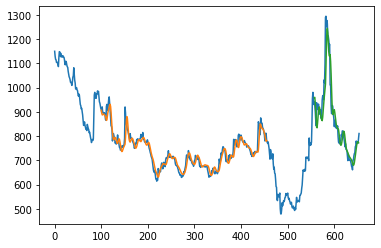

In [ ]:
look_back=100
trainpredictplot=np.empty_like(sk1)
trainpredictplot[:,:]=np.nan
trainpredictplot[look_back:len(train_predict)+look_back,:]=train_predict

testpredictplot=np.empty_like(sk1)
testpredictplot[:,:]=np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(sk1)-1,:]=test_predict

plt.plot(scaler.inverse_transform(sk1))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()

In [ ]:
len(test_data)

197

In [ ]:
x_input=test_data[97:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

   if(len(temp_input)>100):
     #print(temp_input)
     x_input=np.array(temp_input[1:])
     print("{} day input {}".format(i,x_input))
     x_input=x_input.reshape(1,-1)
     x_input=x_input.reshape((1,n_steps,1))
     #print(x_input)
     yhat=model.predict(x_input,verbose=0)
     print("{} day output {}".format(i,yhat))
     temp_input.extend(yhat[0].tolist())
     temp_input=temp_input[1:]
     #print(temp_input)
     lst_output.extend(yhat.tolist())
     i=i+1
   else:
     x_input=x_input.reshape((1,n_steps,1))
     yhat=model.predict(x_input,verbose=0)
     print(yhat[0])
     temp_input.extend(yhat[0].tolist())
     print(len(temp_input))
     lst_output.extend(yhat.tolist())
     i=i+1

print(lst_output)


[0.3612696]
101
1 day input [0.57229693 0.55332472 0.56873585 0.55289496 0.52262539 0.47719038
 0.44661389 0.56241176 0.54540436 0.53521212 0.52716891 0.55553514
 0.52858111 0.50500401 0.52072205 0.52790574 0.49198752 0.4828391
 0.50942468 0.57831403 0.59685639 0.59949656 0.57739305 0.6779027
 0.6629828  0.76109789 0.99428989 1.         0.94695161 0.97900169
 0.96242405 0.89285933 0.89918342 0.88137781 0.851845   0.8575551
 0.65272918 0.65248357 0.54878128 0.50703019 0.50967029 0.54810584
 0.53017746 0.50690735 0.47946218 0.44157916 0.4730767  0.45827964
 0.43574628 0.44606129 0.4440351  0.43071162 0.44532454 0.39289006
 0.36354147 0.3582612  0.36796222 0.3542089  0.36710262 0.37324249
 0.40136303 0.39307421 0.41929149 0.42015108 0.40559956 0.39184624
 0.37625104 0.35574387 0.339289   0.35568249 0.32725488 0.32436917
 0.32197461 0.29262601 0.26954013 0.30232703 0.29311723 0.27328544
 0.27156632 0.27261007 0.26518084 0.25523421 0.24031438 0.23749006
 0.22306137 0.27193469 0.27396081 0.2

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(sk1)

654

In [ ]:
sk2=sk1.tolist()
sk2.extend(lst_output)

In [ ]:
len(sk1)

654

In [ ]:
plt.plot(day_new,scaler.inverse_transform(sk1[654:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

ValueError: ignored

In [ ]:
sk2=sk1.tolist()
sk2.extend(lst_output)
plt.plot(sk2[1500:])

changed a variable name


In [ ]:
sk3=scaler.inverse_transform(sk2).tolist()
plt.plot(sk3)

In [ ]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# compiling the model

In [ ]:
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False), loss='mean_squared_error')

# fitting the model

regressorGRU.fit(x_train, y_train, epochs=5, batch_size=150)

Epoch 1/5
3/3 [==============================] - 0s 21ms/step - loss: 0.0840
Epoch 2/5
3/3 [==============================] - 0s 23ms/step - loss: 0.0118
Epoch 3/5
3/3 [==============================] - 0s 24ms/step - loss: 0.0472
Epoch 4/5
3/3 [==============================] - 0s 22ms/step - loss: 0.0268
Epoch 5/5
3/3 [==============================] - 0s 21ms/step - loss: 0.0121


In [ ]:
predicted_with_gru = regressorGRU.predict(x_test)
predicted_with_gru = scaler.inverse_transform(predicted_with_gru)


In [ ]:
predicted_with_gru

array([[638.282  ],
       [639.13055],
       [639.9367 ],
       [640.63684],
       [641.1534 ],
       [641.4606 ],
       [641.7862 ],
       [642.0853 ],
       [642.29254],
       [642.39966],
       [642.4891 ],
       [642.5415 ],
       [642.53345],
       [642.517  ],
       [642.5186 ],
       [642.4734 ],
       [642.37177],
       [642.28015],
       [642.31354],
       [642.4573 ],
       [642.6546 ],
       [642.8412 ],
       [643.1816 ],
       [643.61975],
       [644.2481 ],
       [645.3599 ],
       [646.7597 ],
       [648.16364],
       [649.5643 ],
       [650.93744],
       [652.1621 ],
       [653.24475],
       [654.1602 ],
       [654.85443],
       [655.34576],
       [655.358  ],
       [654.99866],
       [654.27014],
       [653.2421 ],
       [652.0479 ],
       [650.8393 ],
       [649.6266 ],
       [648.4005 ],
       [647.1748 ],
       [645.96234],
       [644.88367],
       [643.94574],
       [643.1058 ],
       [642.38043],
       [641.7659 ],
